## Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler


## Data Acquisition and Collection
###### Acquire the necessary data from mall_customers.csv

In [2]:
# Read the .CSV file
df = pd.read_csv("../data/mall_customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
295,296,Male,44,78,40
296,297,Female,66,35,20
297,298,Female,51,54,39
298,299,Male,35,30,96


## Data Preprocessing
###### Performing data preprocessing tasks such as encoding.

In [3]:
df = df.drop("CustomerID", axis=1)
df.tail()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
295,Male,44,78,40
296,Female,66,35,20
297,Female,51,54,39
298,Male,35,30,96
299,Male,51,84,96


## Exploratory Data Analysis (EDA)
###### Exploring the dataset to gain insights into its structure, patterns, and relationships, and visualizing the data using charts, graphs, and summary statistics to identify trends, correlations, and anomalies.

#### Univariate analysis

In [4]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,300.000000,300.00000,300.000000
mean,40.486667,65.56000,48.936667
std,14.511781,33.36531,26.490599
min,18.000000,10.00000,1.000000
25%,29.000000,39.00000,29.000000
50%,39.000000,62.00000,48.000000
75%,51.000000,85.00000,72.000000
max,70.000000,149.00000,99.000000


##### kernel density estimate (KDE) 

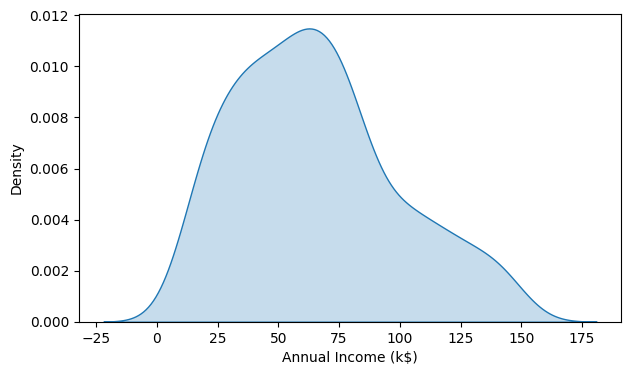

In [5]:
plt.figure(figsize=(7, 4))

# Plot the distribution of Annual Income
sns.kdeplot(data=df["Annual Income (k$)"], shade=True)

plt.show()

##### Histogram

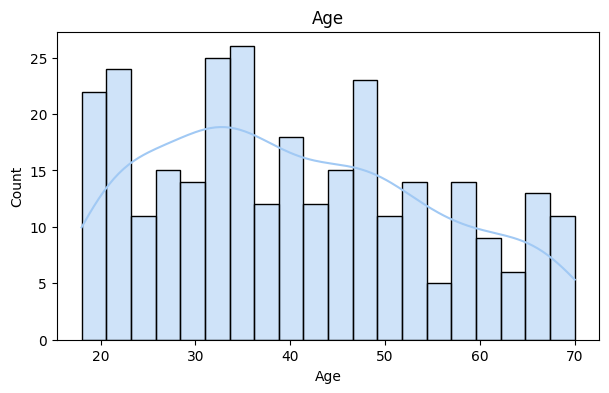

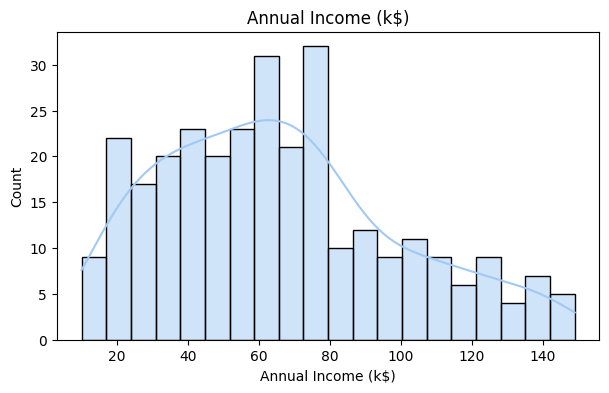

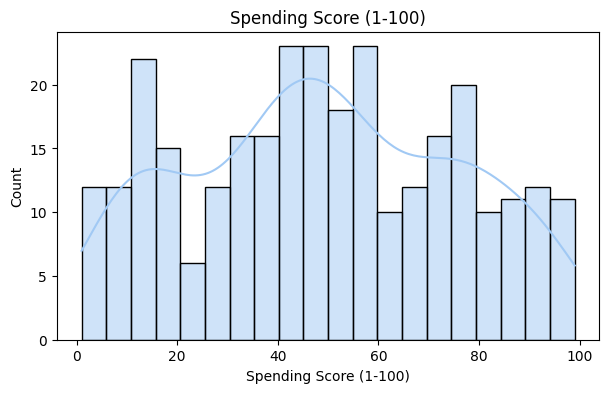

In [6]:
columns = ["Age", "Annual Income (k$)",	"Spending Score (1-100)"]

for c in columns:
    # Set the figure size
    plt.figure(figsize=(7, 4))

    # Customize the color palette
    sns.set_palette("pastel")

    # Plot the distribution of Annual Income
    sns.histplot(data=df[c], bins=20, kde=True)

    # Add title and axis labels
    plt.title(c)
    plt.xlabel(c)
    plt.ylabel("Count")
    
    plt.show()

##### Boxplot

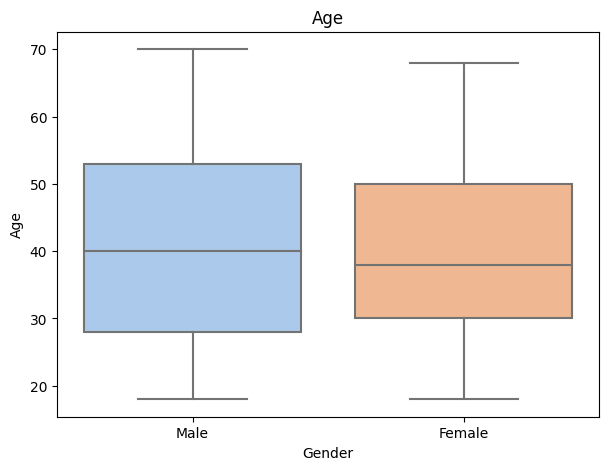

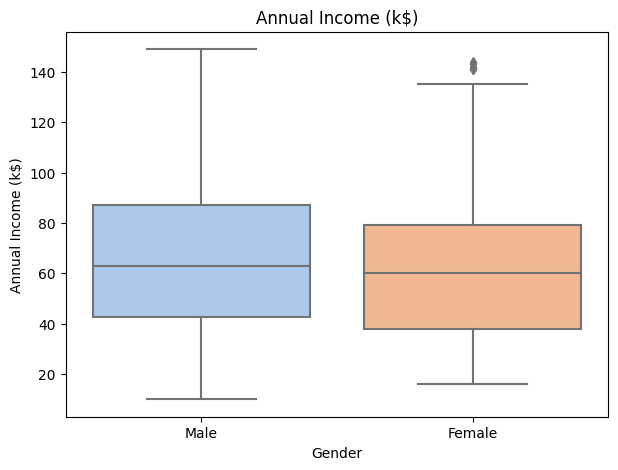

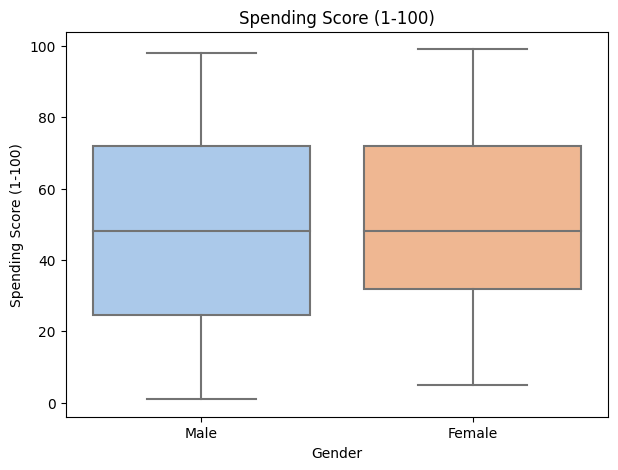

In [7]:
columns = ["Age", "Annual Income (k$)",	"Spending Score (1-100)"]

for c in columns:
    # Set the figure size
    plt.figure(figsize=(7, 5))

    # Plot the distribution of Annual Income
    sns.boxplot(data=df, x="Gender", y=df[c])

    # Add title and axis labels
    plt.title(c)
    plt.xlabel("Gender")
    plt.ylabel(c)
    
    plt.show()

In [8]:
percent_female, percent_male = df["Gender"].value_counts(normalize=True)
print(f"{percent_female} are female and {percent_male} are male")

0.5233333333333333 are female and 0.4766666666666667 are male


#### Bivariate analysis

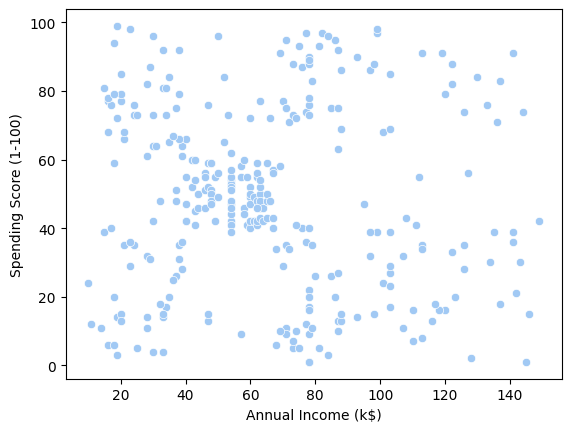

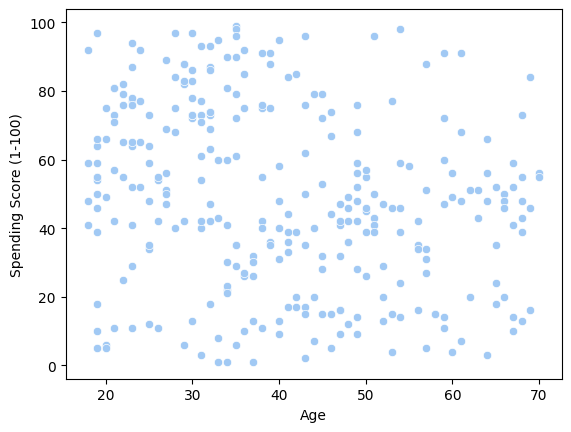

In [9]:
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)")
plt.show()

sns.scatterplot(data=df, x="Age", y="Spending Score (1-100)")
plt.show()

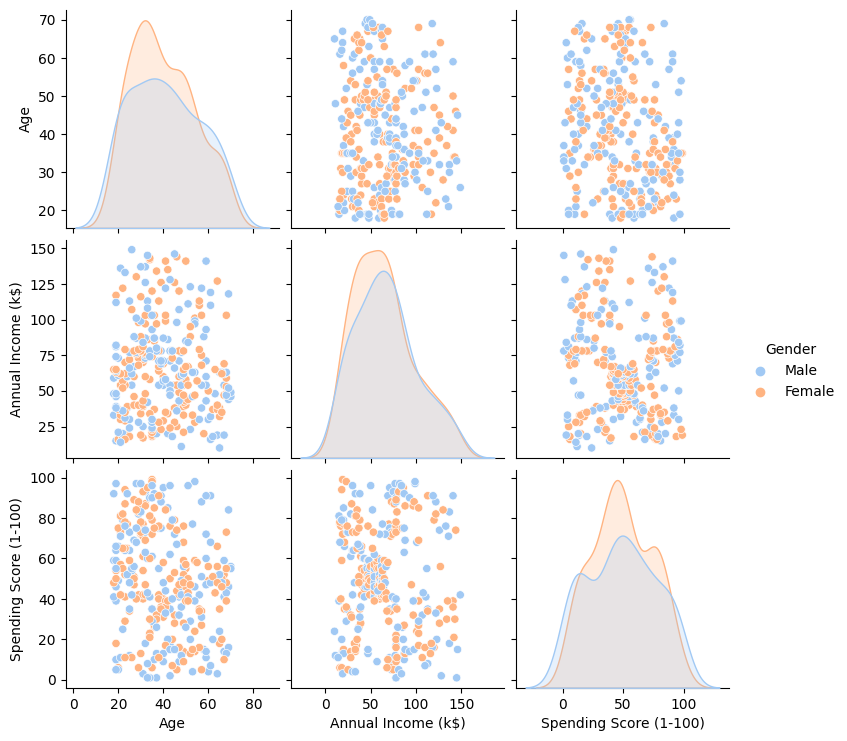

In [10]:
sns.pairplot(df, hue="Gender")
plt.show()

In [11]:
df.groupby(["Gender"])["Age", "Annual Income (k$)",	"Spending Score (1-100)"].mean()

/tmp/ipykernel_37300/1755180588.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Gender"])["Age", "Annual Income (k$)",	"Spending Score (1-100)"].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,40.019108,64.337580,49.210191
Male,41.000000,66.902098,48.636364


##### Correlation

In [12]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.016390,-0.234339
Annual Income (k$),-0.016390,1.000000,-0.078378
Spending Score (1-100),-0.234339,-0.078378,1.000000


<AxesSubplot:>

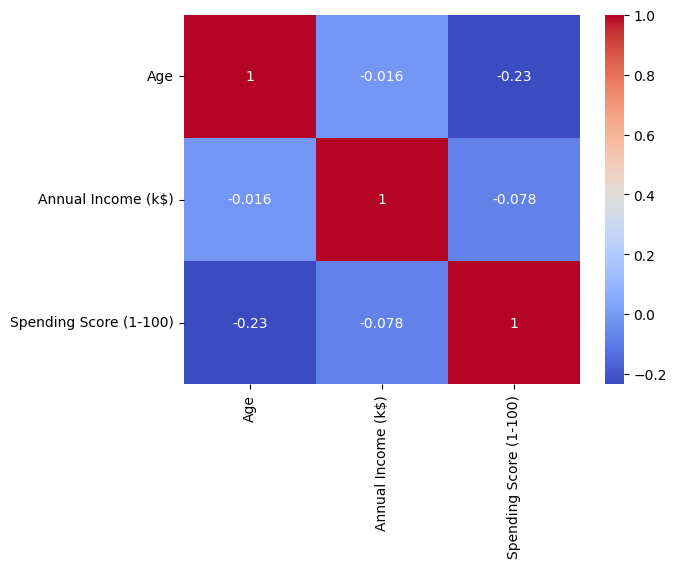

In [13]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

## Model Selection and Training
###### Selected the clustering algorithm(KMeans) to solve the problem.


##### Clustering - Univariate

In [14]:
clustering_univariate = KMeans()
clustering_univariate.fit(df[["Annual Income (k$)"]])
clustering_univariate.labels_

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7,
       3, 3, 6, 6, 0, 1, 6, 1, 2, 3, 7, 4, 0, 3, 0, 0, 0, 2, 5, 2, 6, 2,
       1, 0, 0, 7, 7, 1, 0, 6, 0, 6, 2, 0, 3, 1, 2, 6, 4, 2, 7, 7, 7, 3,
       3, 7, 3, 7, 5, 5, 0, 7, 5, 5, 5, 0, 1, 5, 2, 6, 7, 0, 7, 3, 3, 0,
       6, 7, 0, 3, 7, 3, 3, 0, 6, 3, 6, 7, 3, 3, 0, 4, 0, 4, 7, 6, 7, 4,
       2, 7, 5, 4, 2, 1, 0, 1, 1, 4, 0, 5, 0, 4], d

In [15]:
df["Income Cluster"] = clustering_univariate.labels_
print(df["Income Cluster"].value_counts())
df.tail()

2    56
4    54
0    47
5    45
6    36
1    23
7    23
3    16
Name: Income Cluster, dtype: int64


,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
295,Male,44,78,40,4
296,Female,66,35,20,0
297,Female,51,54,39,5
298,Male,35,30,96,0
299,Male,51,84,96,4


It is a measure of how tightly the clusters are packed around their centroids.

In [16]:
clustering_univariate.inertia_

5826.598142152332

###### This plot helps visualize how the inertia score changes as the number of clusters increases, aiding in the selection of the optimal number of clusters for the dataset.

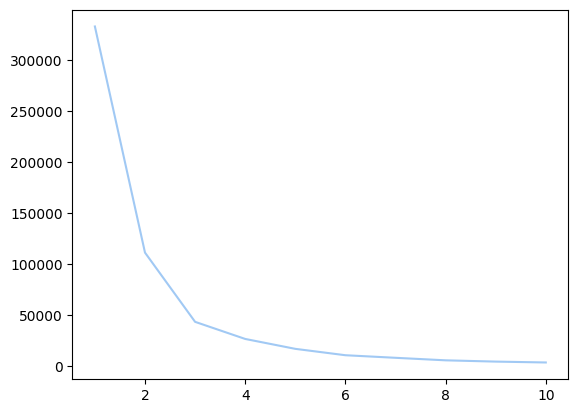

In [17]:
inertia_univariate_scores = []
for i in range(1, 11):
    kmeans_univariate = KMeans(n_clusters=i)
    kmeans_univariate.fit(df[["Annual Income (k$)"]])
    inertia_univariate_scores.append(kmeans_univariate.inertia_)

plt.plot(range(1, 11), inertia_univariate_scores)

In [18]:
df.groupby("Income Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.829787,34.468085,50.510638
1,41.739130,100.434783,48.347826
2,42.125000,63.875000,48.875000
3,36.312500,139.625000,46.875000
4,35.425926,79.722222,48.018519
5,47.422222,49.155556,52.355556
6,37.000000,18.972222,50.583333
7,43.260870,118.565217,40.782609


##### Clustering - Bivariate

In [19]:
clustering_bivariate = KMeans()
clustering_bivariate.fit(df[["Annual Income (k$)", "Spending Score (1-100)"]])
clustering_bivariate.labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 6, 4, 6, 4, 6, 4, 6, 4,
       6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 0, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4,
       6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4,
       6, 4, 6, 4, 5, 4, 5, 4, 5, 4, 5, 7, 5, 4, 5, 7, 5, 7, 5, 7, 1, 7,
       1, 7, 3, 3, 3, 5, 3, 5, 6, 1, 5, 6, 3, 1, 3, 3, 3, 4, 0, 0, 3, 0,
       5, 2, 0, 7, 5, 4, 3, 2, 0, 2, 6, 0, 1, 5, 0, 3, 0, 4, 5, 5, 5, 1,
       1, 1, 7, 1, 3, 3, 3, 5, 2, 0, 2, 3, 5, 0, 0, 3, 1, 2, 7, 7, 1, 2,
       2, 7, 2, 7, 7, 1, 7, 2, 2, 1, 3, 5, 7, 1, 3, 6, 3, 4, 1, 2, 5, 6,
       6, 7, 3, 6, 6, 5, 2, 5, 5, 6, 2, 0, 3, 4], d

In [20]:
df["Spending and Income Cluster"] = clustering_bivariate.labels_
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,6,2
1,Male,21,15,81,6,3
2,Female,20,16,6,6,2
3,Female,23,16,77,6,3
4,Female,31,17,40,6,2
...,...,...,...,...,...,...
295,Male,44,78,40,4,6
296,Female,66,35,20,0,2
297,Female,51,54,39,5,0
298,Male,35,30,96,0,3


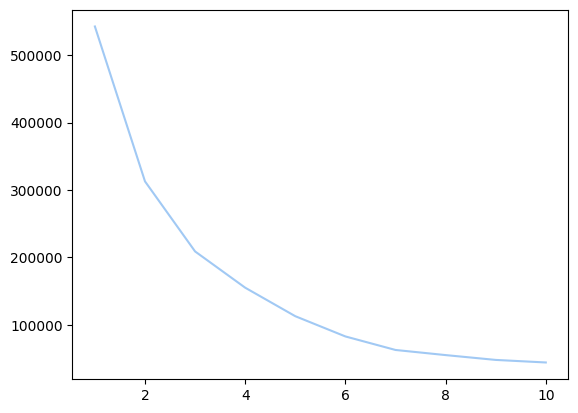

In [21]:
inertia_bivariate_scores = []
for i in range(1, 11):
    kmeans_bivariate = KMeans(n_clusters=i)
    kmeans_bivariate.fit(df[["Annual Income (k$)", "Spending Score (1-100)"]])
    inertia_bivariate_scores.append(kmeans_bivariate.inertia_)
plt.plot(range(1, 11), inertia_bivariate_scores)

##### The points are colored based on the cluster labels generated by some clustering algorithm

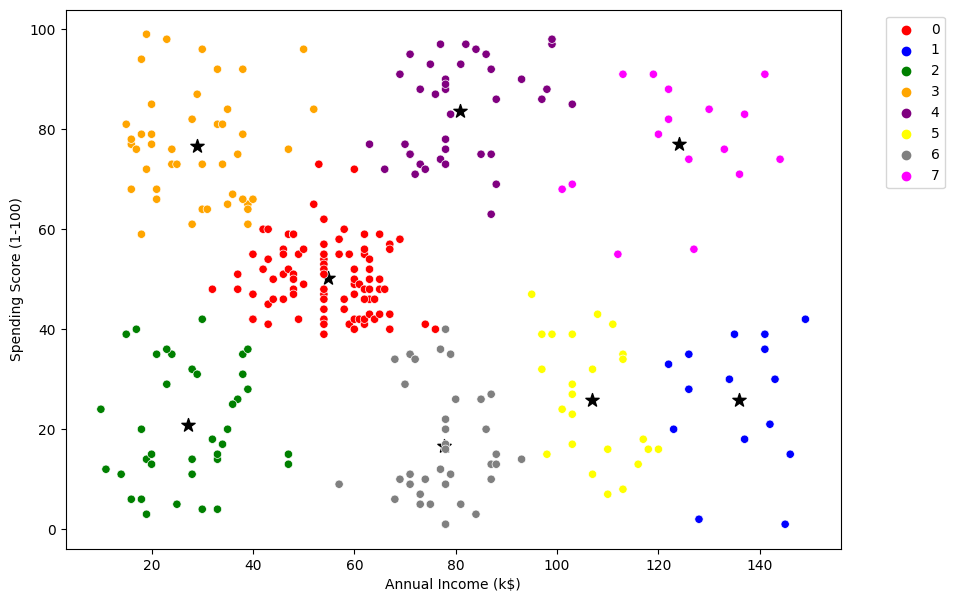

In [22]:
custom_palette = ["red", "blue", "green", "orange", "purple", "yellow", "grey", "magenta"] 
centers = pd.DataFrame(clustering_bivariate.cluster_centers_, columns=["x", "y"])
plt.figure(figsize=(10, 7))
plt.scatter(x=centers["x"], y=centers["y"], s=100, c="black", marker="*")
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)",
                hue="Spending and Income Cluster", palette=custom_palette)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("../reports/clustering_bivariate.png")
plt.show()


##### Percentage of the clusters by genre

In [23]:
pd.crosstab(df["Spending and Income Cluster"], df["Gender"], normalize="index")

Gender,Female,Male
Spending and Income Cluster,,
0,0.577778,0.422222
1,0.533333,0.466667
2,0.513514,0.486486
3,0.545455,0.454545
4,0.473684,0.526316
5,0.583333,0.416667
6,0.416667,0.583333
7,0.437500,0.562500


##### Clustering - Multivariate

In [24]:
scale = StandardScaler()

##### Convert categorical variables into indicator
###### Contain dummy variables for each categorical variable in the original DataFrame

In [25]:
df_categorical_encoded = pd.get_dummies(df, drop_first=True)
df_categorical_encoded = df_categorical_encoded[["Age", "Annual Income (k$)", "Spending Score (1-100)", "Income Cluster", "Gender_Male"]]
df_categorical_encoded

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Gender_Male
0,19,15,39,6,1
1,21,15,81,6,1
2,20,16,6,6,0
3,23,16,77,6,0
4,31,17,40,6,0
...,...,...,...,...,...
295,44,78,40,4,1
296,66,35,20,0,0
297,51,54,39,5,0
298,35,30,96,0,1


In [26]:
clustering_multivariate = KMeans()
clustering_multivariate.fit(df_categorical_encoded[["Annual Income (k$)", "Spending Score (1-100)", "Gender_Male"]])
clustering_multivariate.labels_

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 2,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 7, 3, 7, 6, 7,
       6, 7, 4, 4, 4, 3, 4, 3, 5, 6, 3, 5, 4, 6, 4, 4, 4, 1, 2, 2, 4, 2,
       3, 0, 2, 7, 3, 1, 4, 0, 2, 0, 5, 2, 6, 3, 2, 4, 2, 1, 3, 3, 3, 6,
       6, 6, 7, 6, 4, 4, 4, 3, 0, 2, 0, 4, 3, 2, 2, 4, 3, 0, 7, 7, 6, 0,
       0, 7, 0, 7, 3, 6, 7, 0, 0, 6, 4, 3, 7, 6, 4, 5, 4, 1, 6, 0, 3, 5,
       5, 7, 4, 5, 5, 3, 0, 3, 3, 5, 0, 2, 4, 1], d

In [27]:
df_categorical_encoded["Spending and Income Cluster"] = clustering_multivariate.labels_
df_categorical_encoded.tail()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Gender_Male,Spending and Income Cluster
295,44,78,40,4,1,5
296,66,35,20,0,0,0
297,51,54,39,5,0,2
298,35,30,96,0,1,4
299,51,84,96,4,1,1


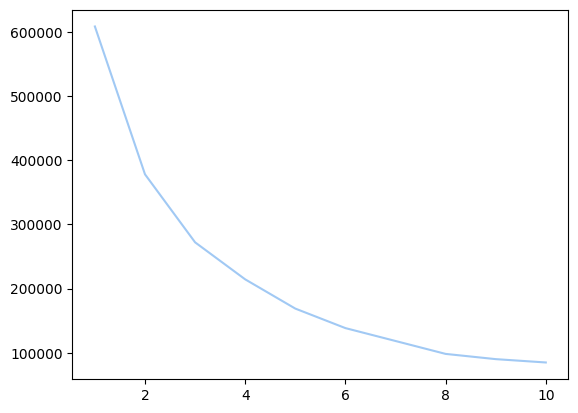

In [28]:
inertia_multivariate_scores = []
for i in range(1, 11):
    kmeans_multivariate = KMeans(n_clusters=i)
    kmeans_multivariate.fit(df_categorical_encoded)
    inertia_multivariate_scores.append(kmeans_multivariate.inertia_)

plt.plot(range(1, 11), inertia_multivariate_scores)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

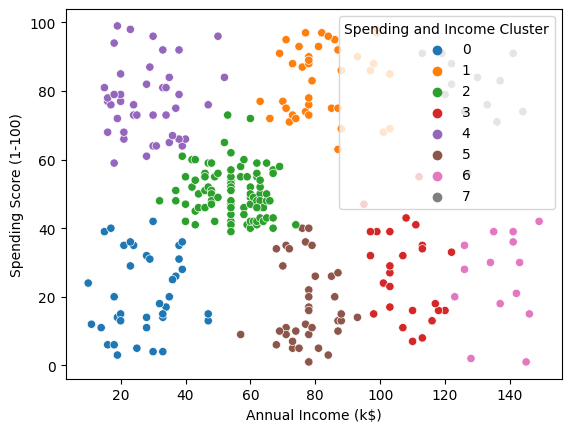

In [29]:
sns.scatterplot(data=df_categorical_encoded, x="Annual Income (k$)", y="Spending Score (1-100)",
                hue="Spending and Income Cluster", palette="tab10")